# Creating MDF SIR Model 
An SIR model is an epidemiological model that computes the theoretical number of people infected with a contagious illness in a closed population over time. The name of this class of models derives from the fact that they involve coupled equations relating the number of susceptible people S(t), number of people infected I(t), and number of people who have recovered R(t).

Susceptible-Infected-Recovered Model into making:
1. **[Create a SIR model graph](#h1)**
2. **[Create nodes for the SIR dynamics](#h2)**
3. **[SIR model in working:](#h3)**
4. **[Plots](#h4)**
  



## 1. Create a SIR model graph <a class="anchor" id="h1"></a>

In [1]:
from modeci_mdf.mdf import*

# Initialize the Model
sir_model = Model(id="SIR_Model")

# Create a Graph within the Model
sir_graph = Graph(id="SIR_Graph")
sir_model.graphs.append(sir_graph)


## 2. Create nodes for the SIR dynamics <a class="anchor" id="h2"></a>

### 1. SIR equation Node

\begin{align*}
\begin{aligned}
S &= \text{Susceptible Population}, \\
I &= \text{Infected Population}, \\
R &= \text{Recovered Population}.
\end{aligned} \\
\\
\frac{\mathrm{d}S}{\mathrm{d}t} &= -\frac{\beta S I}{N},\\
\frac{\mathrm{d}I}{\mathrm{d}t} &= \frac{\beta S I}{N} - \gamma I,\\
\frac{\mathrm{d}R}{\mathrm{d}t} &= \gamma I, \quad \beta = 0.3, \quad \gamma = 0.1. \tag*{(1)}
\end{align*}





In [2]:
# Parameters for the model
total_population = 1000
initial_infected = 1
initial_recovered = 0
initial_susceptible = total_population - initial_infected - initial_recovered
beta = 0.3  # Infection rate
gamma = 0.1  # Recovery rate



# SIR equation Node
sir_node = Node(id="sir_node")

#parameters
total_population = Parameter(id="total_population", value=total_population)
gamma = Parameter(id="gamma", value=gamma)
beta = Parameter(id="beta", value=beta)

#dynamic relationship
susceptible_population = Parameter(id="susceptible_population",
                                    default_initial_value=initial_susceptible,
                                    time_derivative="-beta*susceptible_population*infected_population/total_population"
                                   )
infected_population = Parameter(id="infected_population",
                                    default_initial_value=initial_infected,
                                    time_derivative="beta*susceptible_population*infected_population/total_population - gamma*infected_population"
                                   )
recovered_population = Parameter(id="recovered_population",
                                  default_initial_value=initial_recovered,
                                  time_derivative="gamma*infected_population"
                                 )

#output ports
infected_output1 = OutputPort(id="out_port1",value=susceptible_population.id)
infected_output2 = OutputPort(id="out_port2",value=infected_population.id)
infected_output3 = OutputPort(id="out_port3",value=recovered_population.id)

#Adding components to node
sir_node.parameters.append(gamma)
sir_node.parameters.append(beta)
sir_node.parameters.append(total_population)
sir_node.parameters.append(susceptible_population)
sir_node.parameters.append(infected_population)
sir_node.parameters.append(recovered_population)
sir_node.output_ports.append(infected_output1)
sir_node.output_ports.append(infected_output2)
sir_node.output_ports.append(infected_output3)

print(sir_node.to_yaml())

sir_node:
    parameters:
        gamma:
            value: 0.1
        beta:
            value: 0.3
        total_population:
            value: 1000
        susceptible_population:
            default_initial_value: 999
            time_derivative: -beta*susceptible_population*infected_population/total_population
        infected_population:
            default_initial_value: 1
            time_derivative: beta*susceptible_population*infected_population/total_population
                - gamma*infected_population
        recovered_population:
            default_initial_value: 0
            time_derivative: gamma*infected_population
    output_ports:
        out_port1:
            value: susceptible_population
        out_port2:
            value: infected_population
        out_port3:
            value: recovered_population



### 2. Recovered Node, Infected Node, Susceptible Node

In [3]:
# Recovered Node
recovered_node = Node(id="Recovered")
recovered_input = InputPort(id="input_port")
recovered_output = OutputPort(id="out_port",value=recovered_input.id)
recovered_node.input_ports.append(recovered_input)
recovered_node.output_ports.append(recovered_output)

#Infected Node
infected_node = Node(id="Infected")
infected_input = InputPort(id="input_port")
infected_output = OutputPort(id="out_port",value=infected_input.id)
infected_node.input_ports.append(infected_input)
infected_node.output_ports.append(infected_output)

#Susceptible Node
susceptible_node = Node(id="Susceptible")
susceptible_input = InputPort(id="input_port")
susceptible_output = OutputPort(id="out_port",value=susceptible_input.id)
susceptible_node.input_ports.append(susceptible_input)
susceptible_node.output_ports.append(susceptible_output)

# Add nodes to the graph
sir_graph.nodes.append(sir_node)
sir_graph.nodes.append(recovered_node)
sir_graph.nodes.append(infected_node)
sir_graph.nodes.append(susceptible_node)

print(recovered_node.to_yaml())
print(infected_node.to_yaml())
print(susceptible_node.to_yaml())

Recovered:
    input_ports:
        input_port: {}
    output_ports:
        out_port:
            value: input_port

Infected:
    input_ports:
        input_port: {}
    output_ports:
        out_port:
            value: input_port

Susceptible:
    input_ports:
        input_port: {}
    output_ports:
        out_port:
            value: input_port



### 3. Edges from SIR_node to recovered_node, infected_node, recovered_node

In [4]:
#sir node to recovered node
sir_to_rec_edge = Edge(
    id="sir_to_rec",
    sender=sir_node.id,
    sender_port="out_port3",
    receiver=recovered_node.id,
    receiver_port="input_port",
   
)

#sir node to infected node
sir_to_inf_edge = Edge(
    id="sir_to_inf",
    sender=sir_node.id,
    sender_port="out_port2",
    receiver=infected_node.id,
    receiver_port="input_port",
)

#sir node to susceptible node
sir_to_sus_edge = Edge(
    id="sir_to_sus",
    sender=sir_node.id,
    sender_port="out_port1",
    receiver=susceptible_node.id,
    receiver_port="input_port",
)


# Add edges to the graph
sir_graph.edges.append(sir_to_rec_edge)
sir_graph.edges.append(sir_to_inf_edge)
sir_graph.edges.append(sir_to_sus_edge)

print(sir_to_rec_edge.to_yaml())
print(sir_to_inf_edge.to_yaml())
print(sir_to_sus_edge.to_yaml())

sir_to_rec:
    sender: sir_node
    receiver: Recovered
    sender_port: out_port3
    receiver_port: input_port

sir_to_inf:
    sender: sir_node
    receiver: Infected
    sender_port: out_port2
    receiver_port: input_port

sir_to_sus:
    sender: sir_node
    receiver: Susceptible
    sender_port: out_port1
    receiver_port: input_port



### 4. Save the model to file

The model can be saved to a file (serialized) in either JSON or YAML format.

In [5]:
j_file = "%s.json" % sir_model.id
new_file = sir_model.to_json_file(j_file)
print("Saved to %s" % j_file)
y_file = "%s.yaml" % sir_model.id
new_file = sir_model.to_yaml_file(y_file)
print("Saved to %s" % y_file)

print(sir_model.to_yaml())

Saved to SIR_Model.json
Saved to SIR_Model.yaml
SIR_Model:
    format: ModECI MDF v0.4
    generating_application: Python modeci-mdf v0.4.5
    graphs:
        SIR_Graph:
            nodes:
                sir_node:
                    parameters:
                        gamma:
                            value: 0.1
                        beta:
                            value: 0.3
                        total_population:
                            value: 1000
                        susceptible_population:
                            default_initial_value: 999
                            time_derivative: -beta*susceptible_population*infected_population/total_population
                        infected_population:
                            default_initial_value: 1
                            time_derivative: beta*susceptible_population*infected_population/total_population
                                - gamma*infected_population
                        recovered_population:
   

### 5. SIR Model graph image

Converting MDF graph: SIR_Graph to graphviz (level: 3, format: png)
    Node: sir_node
    Node: Recovered
    Node: Infected
    Node: Susceptible
    Edge: sir_to_rec connects sir_node to Recovered
    Edge: sir_to_inf connects sir_node to Infected
    Edge: sir_to_sus connects sir_node to Susceptible
Written graph image to: sir_model.png


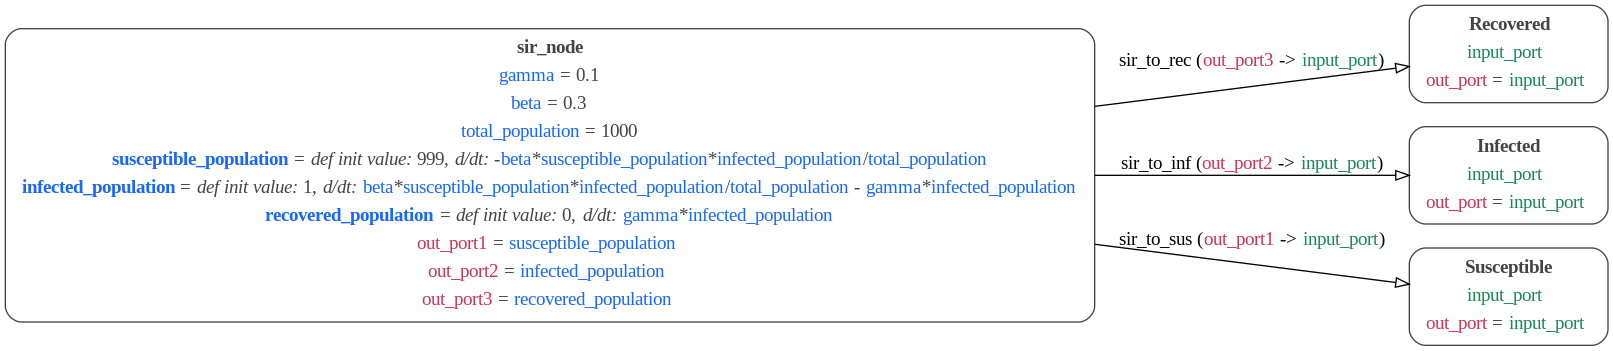

In [6]:
sir_model.to_graph_image(
        engine="dot",
        output_format="png",
        view_on_render=False,
        level=3,
        filename_root="sir_model",
        is_horizontal=True
    )

from IPython.display import Image
Image(filename="sir_model.png")

## 3. SIR model in working: <a class="anchor" id="h3"></a>

In [7]:
from modeci_mdf.execution_engine import EvaluableGraph
eg = EvaluableGraph(sir_graph, verbose=False)
eg.evaluate()


Init graph: SIR_Graph
Evaluating graph: SIR_Graph, root nodes: ['sir_node'], with array format numpy


### Running for 100 days of epidemic

In [8]:
dt = 1
duration = 100
t = 0
times = []
s = []
i = []
r = []
while t <= duration:
    times.append(t)
    print("======   Evaluating at t = %s  ======" % (t))
    if t == 0:
        eg.evaluate()  
    else:
        eg.evaluate(time_increment=dt)

    s.append(eg.enodes["Susceptible"].evaluable_outputs["out_port"].curr_value)
    i.append(eg.enodes["Infected"].evaluable_outputs["out_port"].curr_value)
    r.append(eg.enodes["Recovered"].evaluable_outputs["out_port"].curr_value)
    
    t += dt
    
    
    print('Susceptible polution: %s'%eg.enodes["Susceptible"].evaluable_outputs["out_port"].curr_value)
    print('Infected polution: %s'%eg.enodes["Infected"].evaluable_outputs["out_port"].curr_value)
    print('Recovered polution: %s'%eg.enodes["Recovered"].evaluable_outputs["out_port"].curr_value)
    

     

======   Evaluating at t = 0  ======
Evaluating graph: SIR_Graph, root nodes: ['sir_node'], with array format numpy
Susceptible polution: 999
Infected polution: 1
Recovered polution: 0
======   Evaluating at t = 1  ======
Evaluating graph: SIR_Graph, root nodes: ['sir_node'], with array format numpy
Susceptible polution: 998.7003
Infected polution: 1.19961009
Recovered polution: 0.11996100900000001
======   Evaluating at t = 2  ======
Evaluating graph: SIR_Graph, root nodes: ['sir_node'], with array format numpy
Susceptible polution: 998.3408847129701
Infected polution: 1.4389350205683615
Recovered polution: 0.26385451105683616
======   Evaluating at t = 3  ======
Evaluating graph: SIR_Graph, root nodes: ['sir_node'], with array format numpy
Susceptible polution: 997.9099204145265
Infected polution: 1.72581977806864
Recovered polution: 0.4364364888637002
======   Evaluating at t = 4  ======
Evaluating graph: SIR_Graph, root nodes: ['sir_node'], with array format numpy
Susceptible polut

## 4. Plots <a class="anchor" id="h4"></a>
### Plots of above SIR data

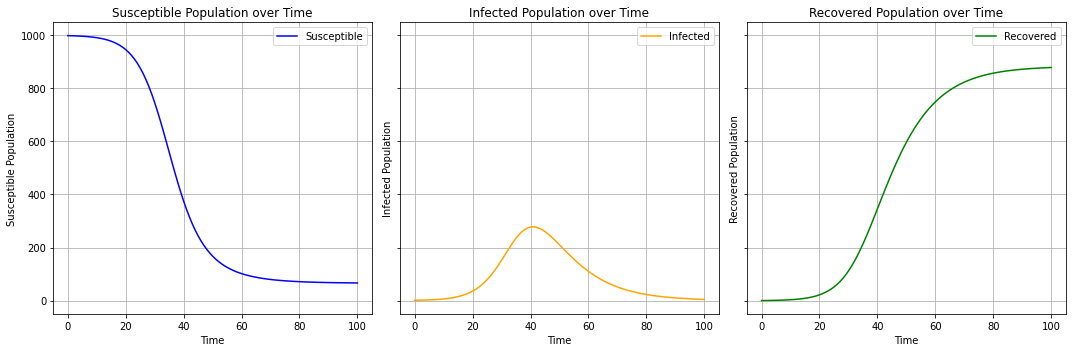

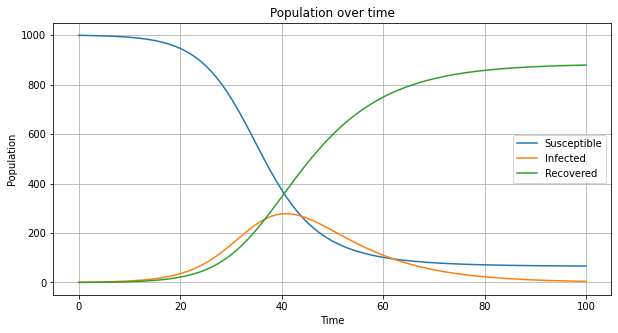

In [9]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5),sharey=True)

# Plotting Susceptible population
axs[0].plot(times, s, label='Susceptible', color='blue')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Susceptible Population')
axs[0].set_title('Susceptible Population over Time')
axs[0].legend()
axs[0].grid(True)

# Plotting Infected population
axs[1].plot(times, i, label='Infected', color='orange')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Infected Population')
axs[1].set_title('Infected Population over Time')
axs[1].legend()
axs[1].grid(True)

# Plotting Recovered population
axs[2].plot(times, r, label='Recovered', color='green')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Recovered Population')
axs[2].set_title('Recovered Population over Time')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# Plotting
plt.figure(figsize=(10, 5))
plt.plot(times, s, label='Susceptible')
plt.plot(times, i, label='Infected')
plt.plot(times, r, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population over time')
plt.legend()
plt.grid(True)
plt.show()
